In [1]:
library(survival)

Warning message:
"package 'survival' was built under R version 4.0.5"


In [2]:
data(cancer)

### Limpieza de datos

In [3]:
cancer

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16


In [4]:
sum(is.na(cancer$meal.cal))

[1] 47

In [5]:
length(cancer$meal.cal)

[1] 228

In [6]:
sapply(cancer, function(x) sum(is.na(x)))

inst      time    status       age       sex   ph.ecog  ph.karno pat.karno 
        1         0         0         0         0         1         1         3 
 meal.cal   wt.loss 
       47        14

In [7]:
na.omit(cancer)
sapply(na.omit(cancer), function(x) sum(is.na(na.omit(cancer))))

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,3,455,2,68,1,0,90,90,1225,15
4,5,210,2,57,1,1,90,60,1150,11
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16
10,7,166,2,61,1,2,70,70,271,34
11,6,170,2,57,1,1,80,80,1025,27
15,12,567,2,57,1,1,80,70,2600,60


inst      time    status       age       sex   ph.ecog  ph.karno pat.karno 
        0         0         0         0         0         0         0         0 
 meal.cal   wt.loss 
        0         0

In [8]:
CanCl <- na.omit(cancer)

### Tabla descriptiva

In [9]:
table(CanCl$status,CanCl$sex)

   
     1  2
  1 21 26
  2 82 38

In [10]:
sexo <- factor(cancer$sex)
levels(sexo) <- c('Masculino', 'Femenino')
table(sexo)

sexo
Masculino  Femenino 
      138        90 

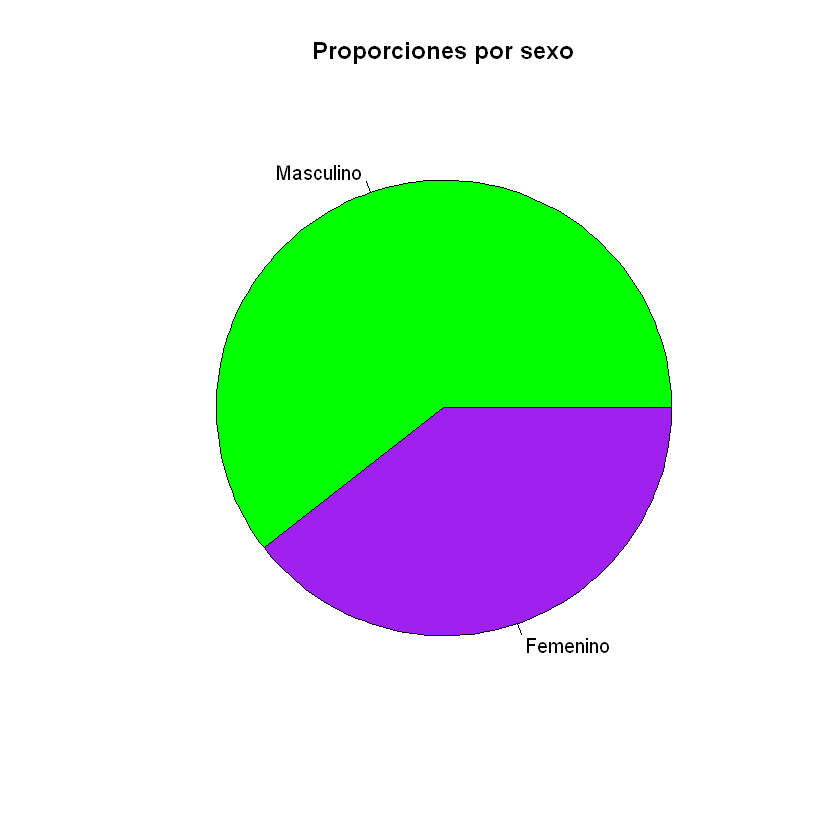

In [11]:
pie(table(sexo),
    col = c('green', 'purple'),
   main = 'Proporciones por sexo')

#### Respuesta compuesta

In [12]:
Resp_comp <- Surv(CanCl$time, CanCl$status == 2)

#### Modelo de Cox

In [13]:
summary(coxph(Resp_comp~CanCl$inst+CanCl$age+CanCl$sex+CanCl$ph.ecog+CanCl$ph.karno+CanCl$pat.karno+CanCl$meal.cal+CanCl$wt.loss))

Call:
coxph(formula = Resp_comp ~ CanCl$inst + CanCl$age + CanCl$sex + 
    CanCl$ph.ecog + CanCl$ph.karno + CanCl$pat.karno + CanCl$meal.cal + 
    CanCl$wt.loss)

  n= 167, number of events= 120 

                      coef  exp(coef)   se(coef)      z Pr(>|z|)    
CanCl$inst      -3.037e-02  9.701e-01  1.312e-02 -2.315 0.020619 *  
CanCl$age        1.281e-02  1.013e+00  1.194e-02  1.073 0.283403    
CanCl$sex       -5.666e-01  5.674e-01  2.014e-01 -2.814 0.004890 ** 
CanCl$ph.ecog    9.074e-01  2.478e+00  2.386e-01  3.803 0.000143 ***
CanCl$ph.karno   2.658e-02  1.027e+00  1.163e-02  2.286 0.022231 *  
CanCl$pat.karno -1.091e-02  9.891e-01  8.141e-03 -1.340 0.180160    
CanCl$meal.cal   2.602e-06  1.000e+00  2.677e-04  0.010 0.992244    
CanCl$wt.loss   -1.671e-02  9.834e-01  7.911e-03 -2.112 0.034647 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                exp(coef) exp(-coef) lower .95 upper .95
CanCl$inst         0.9701     1.0308    0.9455    0.995

Al menos una variable es significativa

In [14]:
summary( coxph(Resp_comp~CanCl$inst+CanCl$sex+CanCl$ph.ecog+CanCl$ph.karno+CanCl$wt.loss))

Call:
coxph(formula = Resp_comp ~ CanCl$inst + CanCl$sex + CanCl$ph.ecog + 
    CanCl$ph.karno + CanCl$wt.loss)

  n= 167, number of events= 120 

                    coef exp(coef)  se(coef)      z Pr(>|z|)    
CanCl$inst     -0.030042  0.970404  0.012931 -2.323  0.02016 *  
CanCl$sex      -0.571959  0.564419  0.198865 -2.876  0.00403 ** 
CanCl$ph.ecog   0.993224  2.699926  0.232115  4.279 1.88e-05 ***
CanCl$ph.karno  0.021492  1.021725  0.011222  1.915  0.05547 .  
CanCl$wt.loss  -0.014800  0.985309  0.007664 -1.931  0.05348 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

               exp(coef) exp(-coef) lower .95 upper .95
CanCl$inst        0.9704     1.0305    0.9461    0.9953
CanCl$sex         0.5644     1.7717    0.3822    0.8334
CanCl$ph.ecog     2.6999     0.3704    1.7131    4.2553
CanCl$ph.karno    1.0217     0.9787    0.9995    1.0444
CanCl$wt.loss     0.9853     1.0149    0.9706    1.0002

Concordance= 0.641  (se = 0.032 )
Likelihood ratio test= 3

Las variables son significativas para un alfa de 0.1

In [15]:
Cox_Can <- coxph(Resp_comp~CanCl$inst+CanCl$sex+CanCl$ph.ecog+CanCl$ph.karno+CanCl$wt.loss)

Modelo elegido al 90%

Residuos de Martingala

In [16]:
resid(Cox_Can, type = 'martingale')

1           2           3           4           5           6 
 0.27763740  0.39617818 -2.14969015 -0.13388782 -0.13606898  0.56477241 
          7           8           9          10          11          12 
 0.51667334  0.72983419  0.15797909 -1.26788329 -1.82695104  0.86787702 
         13          14          15          16          17          18 
 0.31829887  0.93791789  0.57915260 -0.14032917 -0.86349891  0.27605965 
         19          20          21          22          23          24 
-0.34182017  0.95328030 -0.15587499  0.92305951  0.82828140  0.87148484 
         25          26          27          28          29          30 
-3.36476845 -1.60622014  0.76746509 -1.06889258 -0.68348098  0.77634461 
         31          32          33          34          35          36 
 0.74418773 -0.50396688  0.70255647  0.64205038 -0.95107542 -0.07728431 
         37          38          39          40          41          42 
-0.70844111  0.97602371  0.56308678 -2.36083098  0.99747609 -0.72637867 
         43          44          45          46          47          48 
-0.01280669 -0.15027883  0.76448013  0.92842946  0.61218554  0.67807976 
         49          50          51          52          53          54 
-1.25323860  0.44571257  0.51887988 -1.85252867  0.56820213  0.96311308 
         55          56          57          58          59          60 
 0.72695279  0.32363736 -0.32645350  0.18438497  0.85776644 -1.50869003 
         61          62          63          64          65          66 
 0.88654345 -0.36817968  0.85743880 -3.26033347  0.30531284  0.01567948 
         67          68          69          70          71          72 
 0.89835058 -1.25385503  0.12928711 -0.54494737  0.79403680  0.70971016 
         73          74          75          76          77          78 
 0.87910977 -1.13979625 -0.70605856  0.05587315  0.77907666 -0.71197730 
         79          80          81          82          83          84 
-0.47020263 -0.15574450  0.98652350  0.50226711  0.32379583  0.93724674 
         85          86          87          88          89          90 
-0.01400997 -1.88141380 -0.06782516  0.09029812  0.70310544 -0.13427734 
         91          92          93          94          95          96 
 0.84892163  0.02041084  0.75125339  0.84675077  0.90074656 -1.69755034 
         97          98          99         100         101         102 
 0.72430551  0.31165854  0.63275630 -0.71115170 -1.85759808  0.45437962 
        103         104         105         106         107         108 
 0.47833412 -0.93094226  0.35808315  0.90654471 -1.01676511  0.46713864 
        109         110         111         112         113         114 
 0.73159521  0.97818568  0.55693857  0.72008985 -0.50121713  0.63160047 
        115         116         117         118         119         120 
-0.74248691 -0.15348315  0.53497551 -0.85886257  0.66892820 -1.14325200 
        121         122         123         124         125         126 
-0.13448009  0.61312469  0.42820757  0.57796326 -0.99369788  0.69188856 
        127         128         129         130         131         132 
 0.59892400 -0.31696578 -1.26145418 -0.45419302  0.07230644  0.84516395 
        133         134         135         136         137         138 
-0.24693893 -0.42543117 -0.60880657 -0.20950276 -0.22742066  0.08471874 
        139         140         141         142         143         144 
-0.32698879  0.84492572  0.76751548  0.51096552 -0.55019317  0.37461663 
        145         146         147         148         149         150 
-0.27072607 -0.17953316 -0.30336484  0.85005695  0.95002360  0.96081708 
        151         152         153         154         155         156 
-0.08243904 -0.18209156 -0.11914446  0.41655858 -0.28173794 -0.41862648 
        157         158         159         160         161         162 
-0.45565076 -0.49458353  0.25292069 -0.56275494 -0.08070701 -0.29778921 
        163         164         165         166         167 
-0.2552

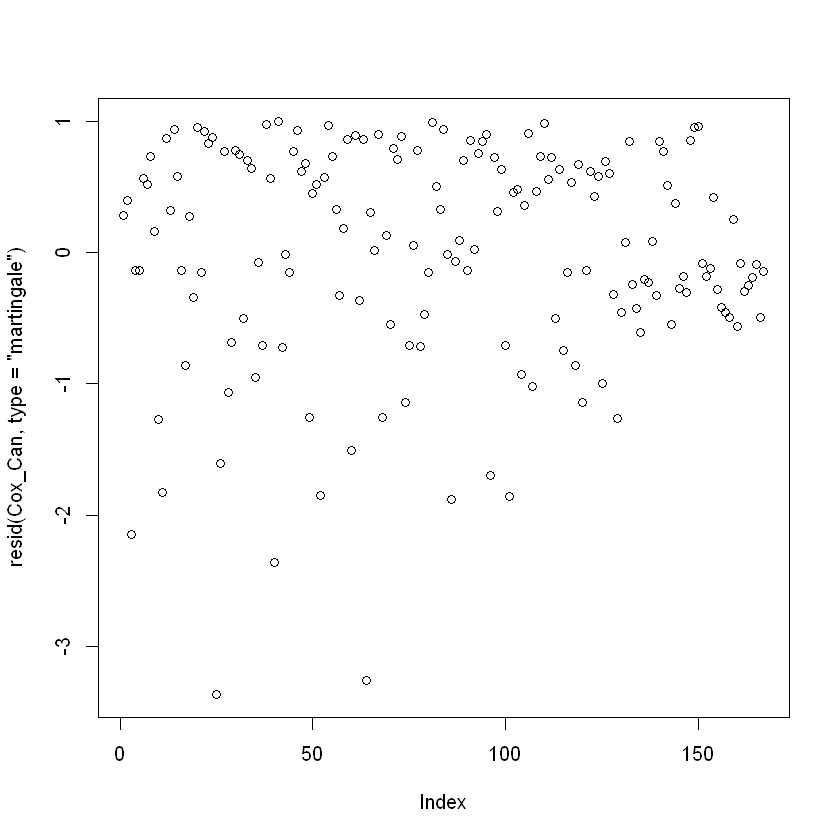

In [17]:
plot(resid(Cox_Can, type = 'martingale'))

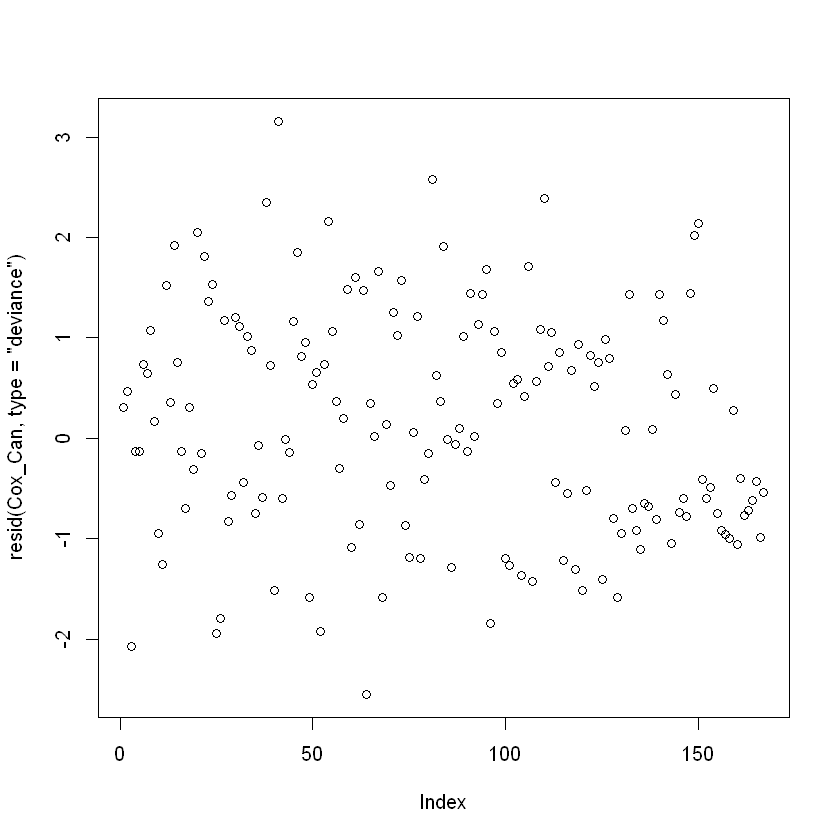

In [18]:
plot(resid(Cox_Can, type = 'deviance'))

Residuo de desvios

In [19]:
d <- resid(Cox_Can, type = 'deviance')
d[abs(d)>3]

41 
3.157363

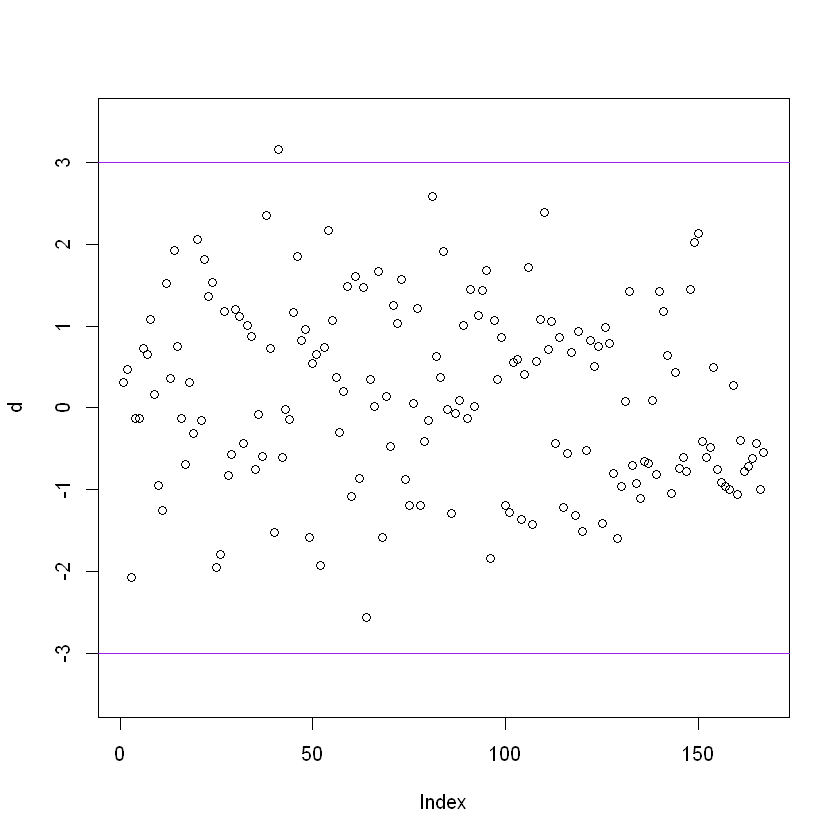

In [20]:
plot(d, ylim = c(-3.5,  3.5))
abline(h = c(-3,3),
      col = 'purple')

Eliminación de dato atipico

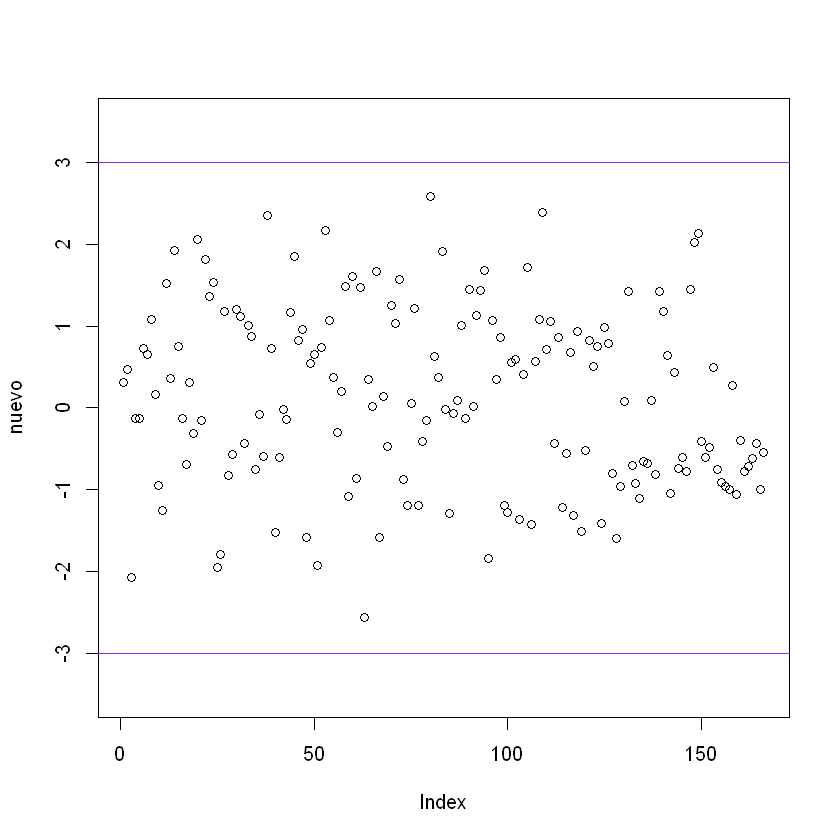

In [21]:
nuevo <- d[-41]
plot(nuevo, 
    ylim = c(-3.5,3.5))
abline(h = c(-3,3),
      col = 'purple')

In [22]:
Cox_Sin41 <- coxph(Resp_comp[-41]~CanCl$inst[-41]+CanCl$sex[-41]+CanCl$ph.ecog[-41]+CanCl$ph.karno[-41]+CanCl$wt.loss[-41])

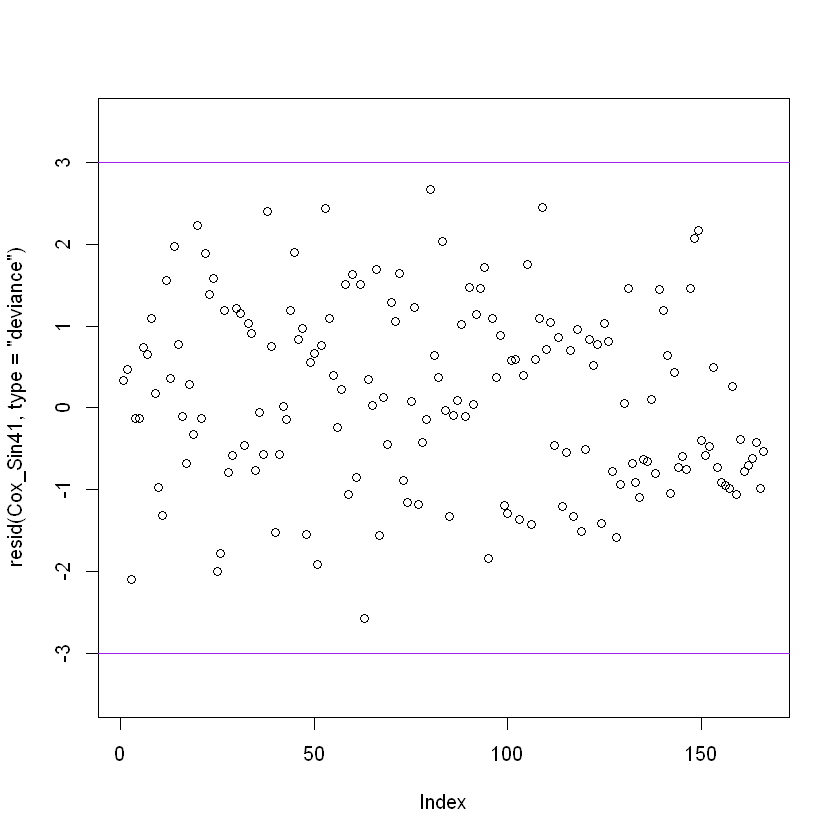

In [23]:
plot(resid(Cox_Sin41, type = 'deviance'),
    ylim = c(-3.5,3.5))
abline(h =c(-3,3),
      col = 'purple')

Residuales de Schoenfeld

Imprime un vector de residuales por variable

In [24]:
Res_Scho <- resid(Cox_Sin41, type = 'schoenfeld')
Res_Scho

,CanCl$inst[-41],CanCl$sex[-41],CanCl$ph.ecog[-41],CanCl$ph.karno[-41],CanCl$wt.loss[-41]
11,-4.229700,-0.2516312,0.6887517,-8.00961047,-9.5388505
12,-8.311822,-0.2565167,0.7021241,-8.16512027,10.2759489
13,-8.448126,-0.2607233,0.7136382,-8.29901888,10.4444627
15,3.411025,-0.2650702,-1.2744639,11.56261772,0.6185955
26,-8.579707,-0.2657904,0.7220731,-18.40596429,10.6202763
30,2.302766,-0.2694313,0.7319643,1.34190618,-2.2342444
31,2.345912,-0.2744795,-1.2543213,21.36704883,17.7238936
53,2.368396,-0.2764252,0.7441037,-8.59773746,0.7697824
53,11.368396,-0.2764252,-1.2558963,11.40226254,-9.2302176
54,1.416922,-0.2800243,0.7498610,-18.67037126,-12.2398497


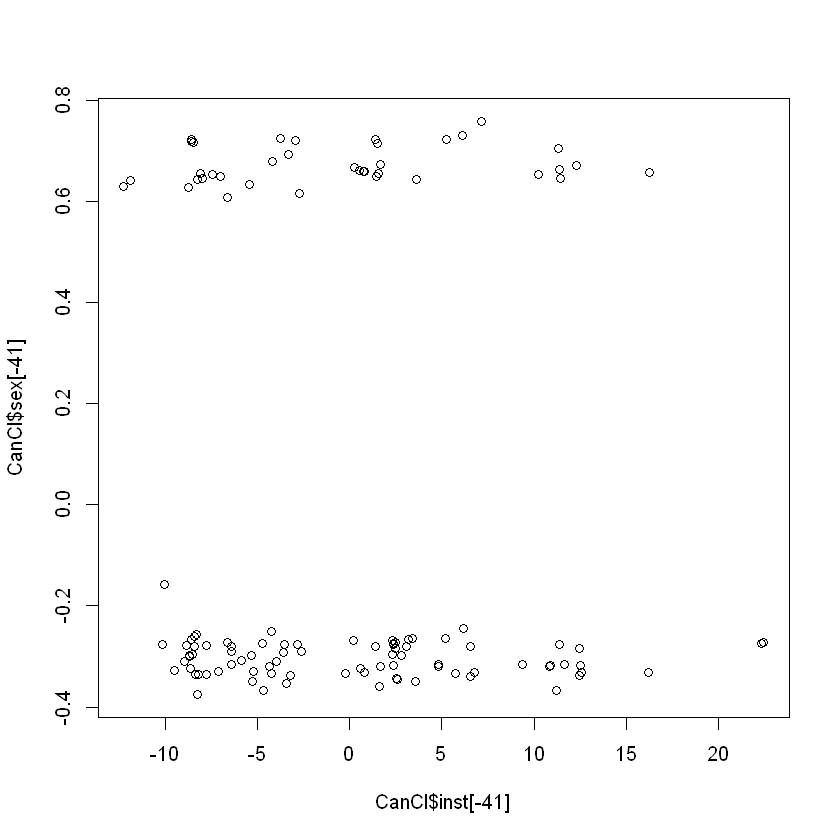

In [25]:
plot(Res_Scho)

In [35]:
length(CanCl$sex[-41])

[1] 166

In [39]:
length(CanCl_Sin41$sex[CanCl_Sin41$status == 2])

[1] 119

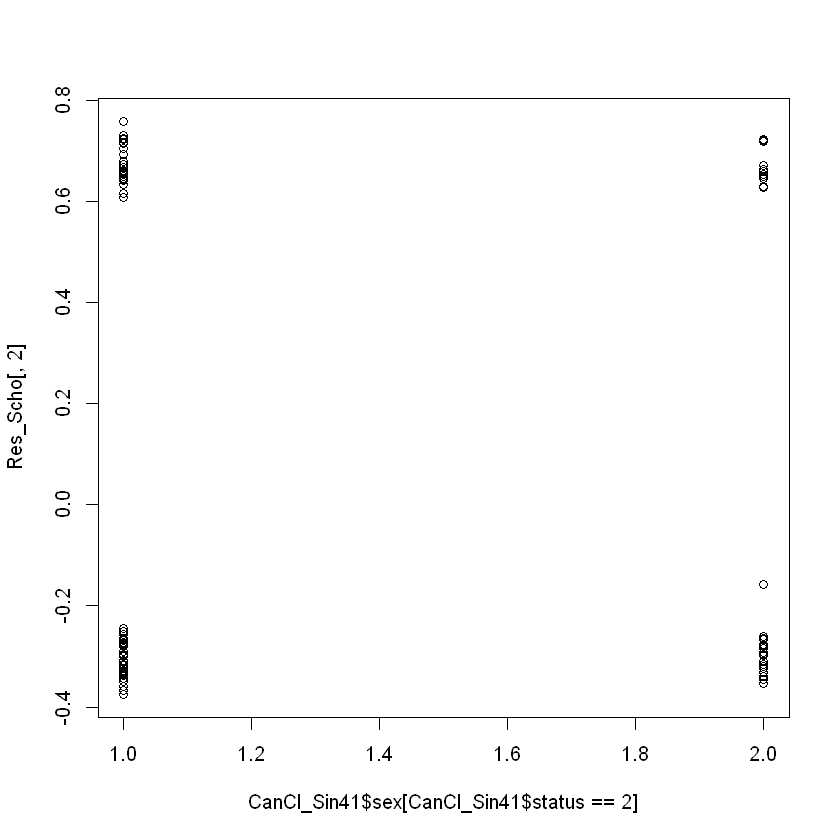

In [42]:
CanCl_Sin41 <- CanCl[-41,]
plot(CanCl_Sin41$sex[CanCl_Sin41$status == 2], Res_Scho[,2])

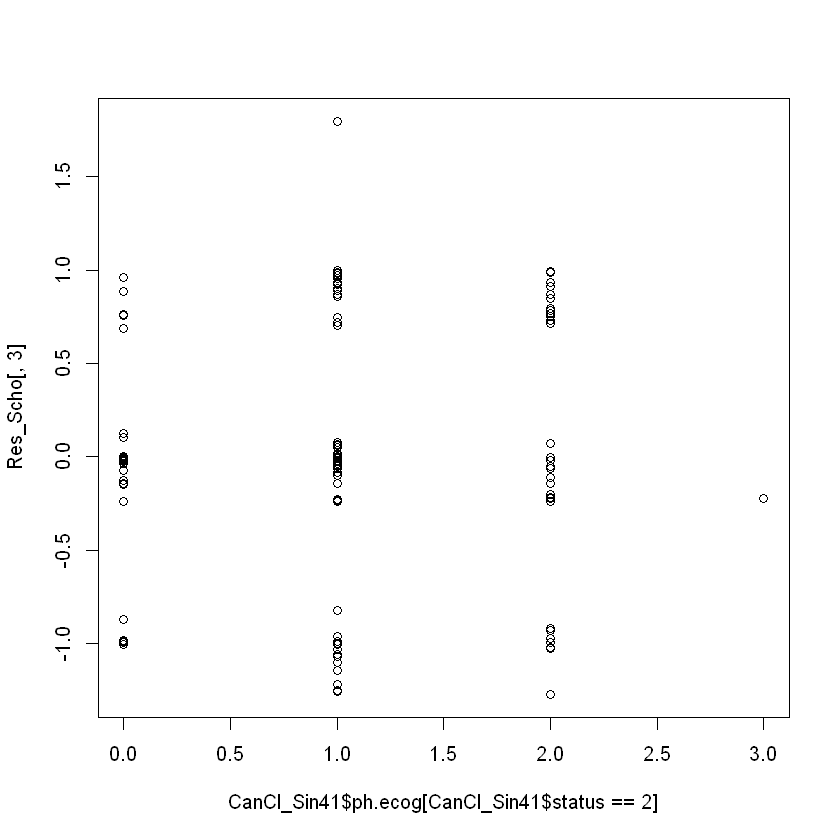

In [43]:
plot(CanCl_Sin41$ph.ecog[CanCl_Sin41$status == 2], Res_Scho[,3])

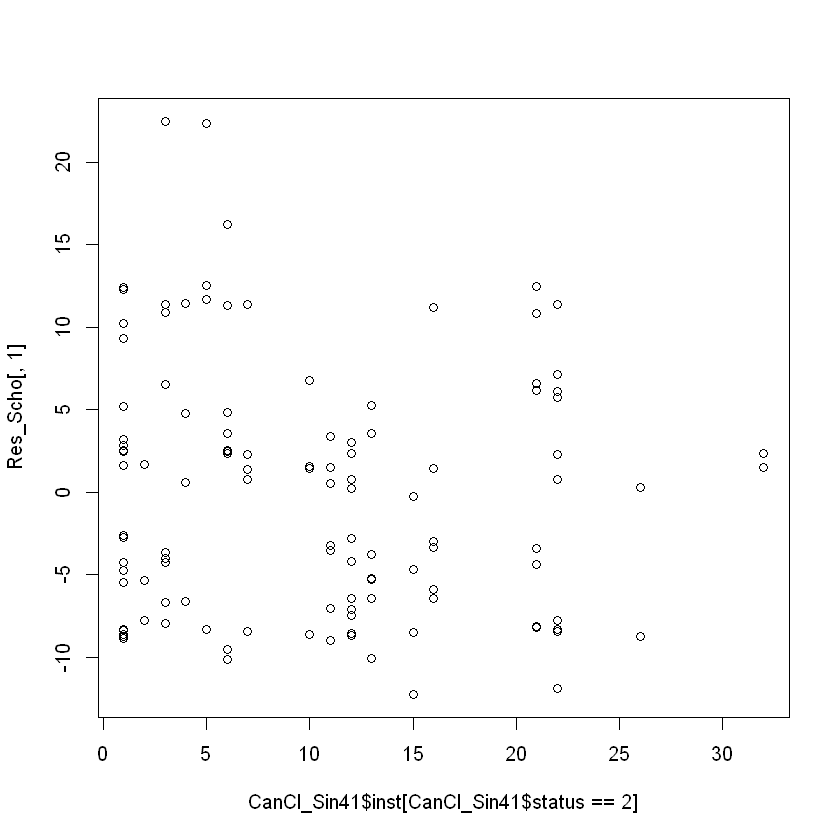

In [44]:
plot(CanCl_Sin41$inst[CanCl_Sin41$status == 2], Res_Scho[,1])

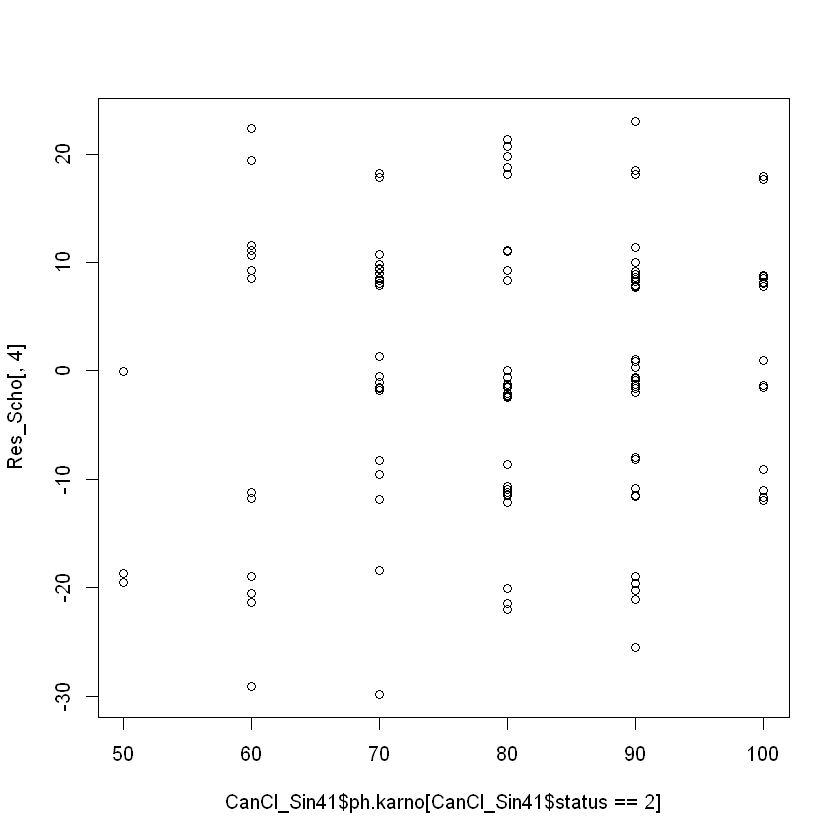

In [45]:
plot(CanCl_Sin41$ph.karno[CanCl_Sin41$status == 2], Res_Scho[,4])

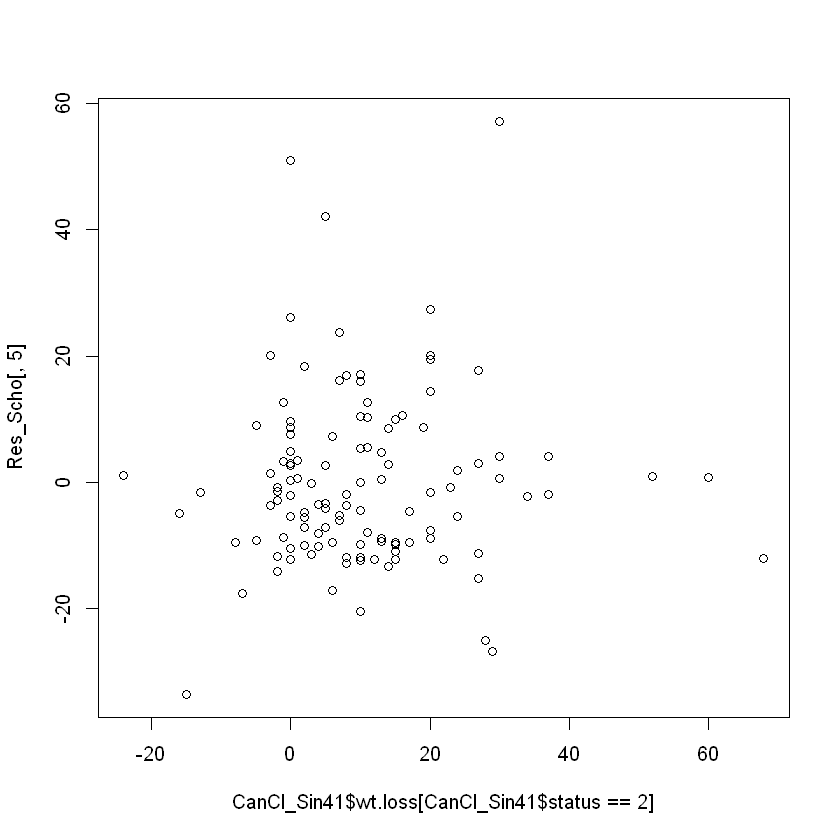

In [47]:
plot(CanCl_Sin41$wt.loss[CanCl_Sin41$status == 2], Res_Scho[,5])

Residuales de puntaje

In [51]:
Res_Punt <- resid(Cox_Sin41, type = 'score')

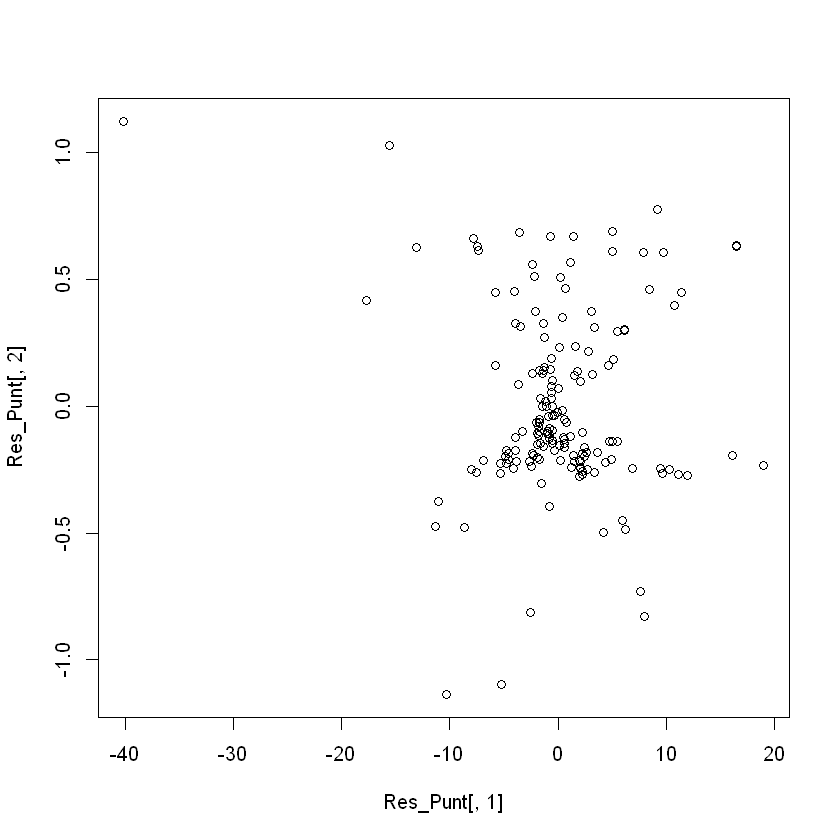

In [52]:
plot(Res_Punt[,1],Res_Punt[,2])

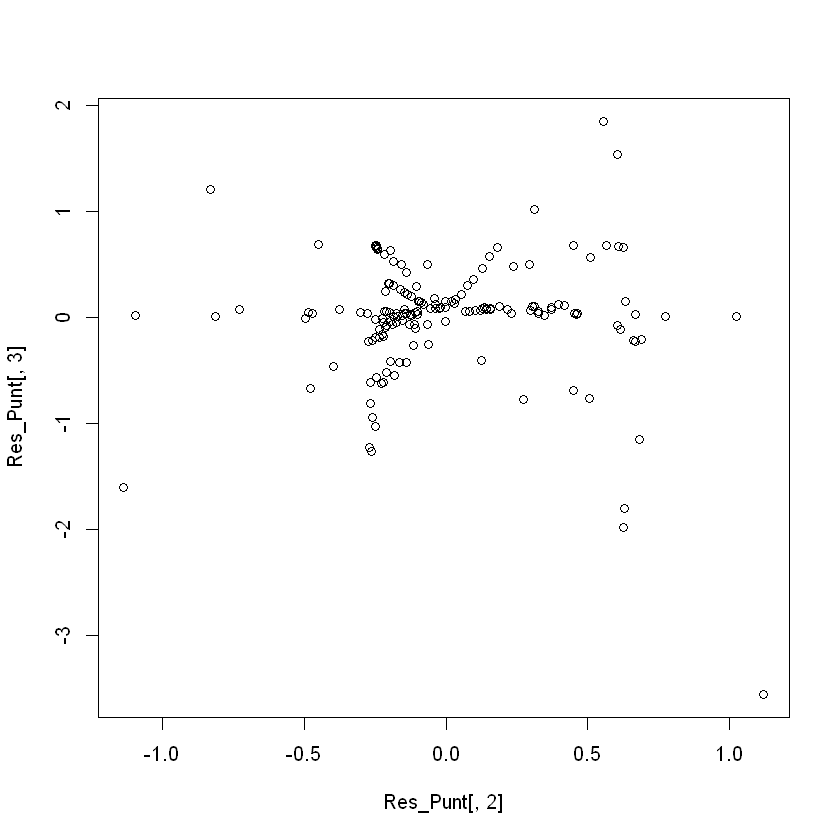

In [53]:
plot(Res_Punt[,2],Res_Punt[,3])

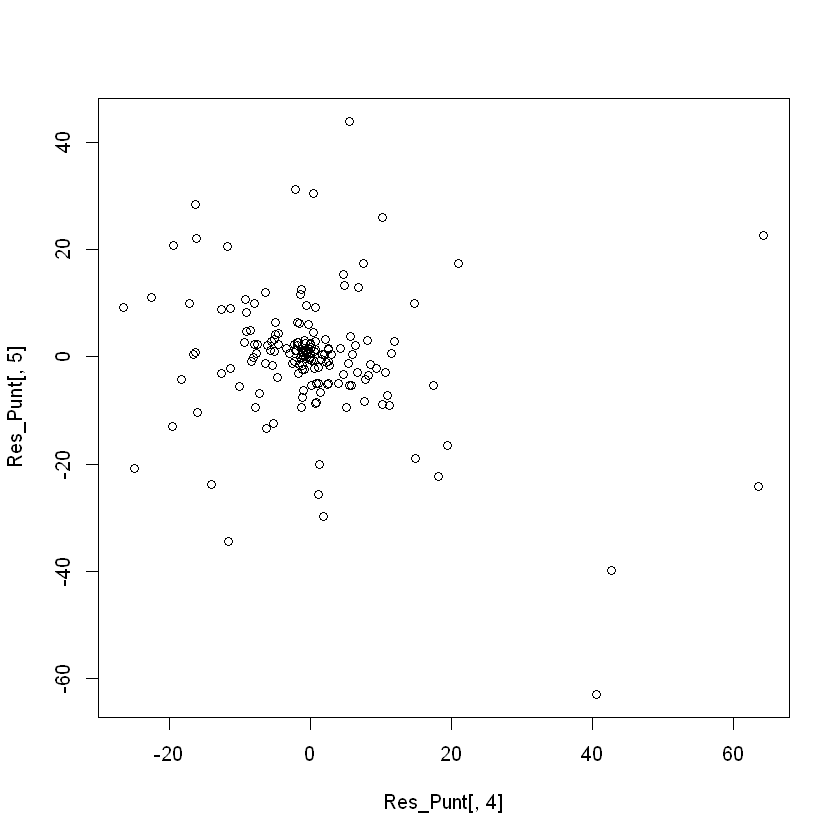

In [54]:
plot(Res_Punt[,4],Res_Punt[,5])

Estimación de función de supervivencia general

In [58]:
summary(survfit(Cox_Sin41))

Call: survfit(formula = Cox_Sin41)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    166       1   0.9951 0.00492       0.9855        1.000
   12    165       1   0.9901 0.00701       0.9764        1.000
   13    164       1   0.9850 0.00864       0.9683        1.000
   15    163       1   0.9799 0.01003       0.9605        1.000
   26    162       1   0.9748 0.01124       0.9531        0.997
   30    161       1   0.9697 0.01234       0.9458        0.994
   31    160       1   0.9645 0.01338       0.9386        0.991
   53    159       2   0.9541 0.01523       0.9247        0.984
   54    157       1   0.9489 0.01607       0.9179        0.981
   59    156       1   0.9436 0.01688       0.9111        0.977
   60    155       2   0.9331 0.01839       0.8977        0.970
   61    153       1   0.9278 0.01909       0.8911        0.966
   62    152       1   0.9225 0.01977       0.8845        0.962
   65    151       1   0.9172 0.02042       0.8780        0.958
   7

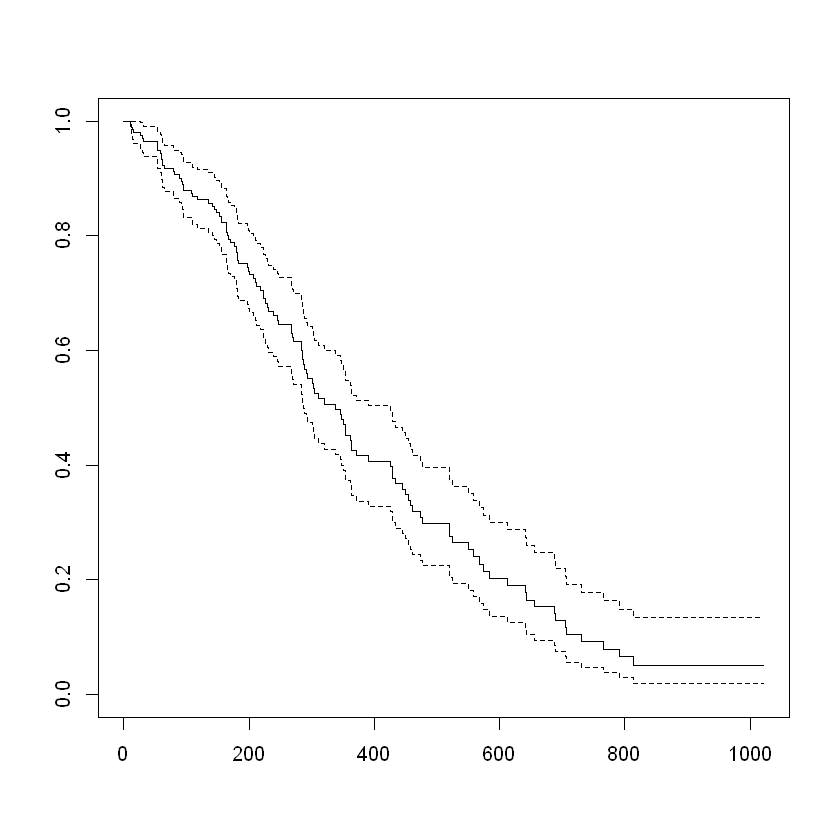

In [59]:
plot(survfit(Cox_Sin41))



KM para sex

In [1]:
KM_sex <- survfit()

ERROR: Error in survfit(): no se pudo encontrar la función "survfit"
